In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import csv
import cv2
from google.colab.patches import cv2_imshow
# importing os module   
import os

In [7]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# '/content/drive/My Drive/IITB_assignments/AML_assignments/P01-0080-icontour-manual.txt'
!ls "/content/drive/My Drive/AML assignment/AML_assignments/unrar_files/TrainingSet/" | fgrep ".txt" | sort > contour_names.txt
# !ls "/content/drive/My Drive/AML assignment/AML_assignments/TestContours/Test1SetContours/"
# !cat contour_names.txt
!ls "/content/drive/My Drive/AML assignment/AML_assignments/jpg_images/Train_data/" | fgrep ".jpg" > image_names.txt
# !cat image_names.txt

In [8]:
contour_map_dict = dict()
print(contour_map_dict)
with open('image_names.txt','r') as file1: 
  for line1 in file1: 
    key = line1.rstrip()
    with open('contour_names.txt','r') as file: 
        # reading each line     
        for line in file: 
          value = line.rstrip()
          if (key[0:8] == value[0:8]):
            if key in contour_map_dict.keys():
              contour_map_dict[key].append(value)
            else:
              contour_map_dict[key] = [value]   

{}


In [ ]:
# for key, contour in contour_map_dict.items():
#   dir_images = r'/content/drive/My Drive/AML assignment/AML_assignments/Test_images/set2/'
#   image_path = r'/content/drive/My Drive/AML assignment/AML_assignments/jpg_images/Test2_data/'+ key
#   img = cv2.imread(image_path)
#   # cv2_imshow(img)
#   os.chdir(dir_images) 
#   cv2.imwrite(key, img)

In [9]:
print(contour_map_dict)
print(len(contour_map_dict.keys()))

{'P01-0080.jpg': ['P01-0080-icontour-manual.txt', 'P01-0080-ocontour-manual.txt'], 'P01-0100.jpg': ['P01-0100-icontour-manual.txt', 'P01-0100-ocontour-manual.txt'], 'P01-0108.jpg': ['P01-0108-icontour-manual.txt', 'P01-0108-ocontour-manual.txt'], 'P01-0120.jpg': ['P01-0120-icontour-manual.txt', 'P01-0120-ocontour-manual.txt'], 'P01-0128.jpg': ['P01-0128-icontour-manual.txt', 'P01-0128-ocontour-manual.txt'], 'P01-0140.jpg': ['P01-0140-icontour-manual.txt', 'P01-0140-ocontour-manual.txt'], 'P01-0148.jpg': ['P01-0148-icontour-manual.txt', 'P01-0148-ocontour-manual.txt'], 'P01-0160.jpg': ['P01-0160-icontour-manual.txt', 'P01-0160-ocontour-manual.txt'], 'P01-0168.jpg': ['P01-0168-icontour-manual.txt', 'P01-0168-ocontour-manual.txt'], 'P01-0180.jpg': ['P01-0180-icontour-manual.txt', 'P01-0180-ocontour-manual.txt'], 'P01-0188.jpg': ['P01-0188-icontour-manual.txt', 'P01-0188-ocontour-manual.txt'], 'P01-0200.jpg': ['P01-0200-icontour-manual.txt', 'P01-0200-ocontour-manual.txt'], 'P01-0208.jpg':

P01-0080.jpg----P01-0080-icontour-manual.txt P01-0080-ocontour-manual.txt
Successfully saved
P01-0100.jpg----P01-0100-icontour-manual.txt P01-0100-ocontour-manual.txt
Successfully saved
P01-0108.jpg----P01-0108-icontour-manual.txt P01-0108-ocontour-manual.txt
Successfully saved
P01-0120.jpg----P01-0120-icontour-manual.txt P01-0120-ocontour-manual.txt
Successfully saved
P01-0128.jpg----P01-0128-icontour-manual.txt P01-0128-ocontour-manual.txt
Successfully saved
P01-0140.jpg----P01-0140-icontour-manual.txt P01-0140-ocontour-manual.txt
Successfully saved
P01-0148.jpg----P01-0148-icontour-manual.txt P01-0148-ocontour-manual.txt
Successfully saved
P01-0160.jpg----P01-0160-icontour-manual.txt P01-0160-ocontour-manual.txt
Successfully saved
P01-0168.jpg----P01-0168-icontour-manual.txt P01-0168-ocontour-manual.txt
Successfully saved
P01-0180.jpg----P01-0180-icontour-manual.txt P01-0180-ocontour-manual.txt
Successfully saved
P01-0188.jpg----P01-0188-icontour-manual.txt P01-0188-ocontour-manual.

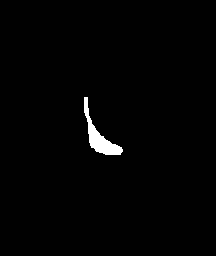

In [10]:
# !rm '/content/drive/My Drive/AML assignment/AML_assignments/Contours/*'
# !rm '/content/drive/My Drive/AML assignment/AML_assignments/Images/*'
for key, contour in contour_map_dict.items():
  #to get contour plots
  x = []
  y = []
  print(key+"----"+contour[0],contour[1])
  filename_i = '/content/drive/My Drive/AML assignment/AML_assignments/unrar_files/TrainingSet/'+contour[0]
  # filename_o = '/content/drive/My Drive/AML assignment/AML_assignments/TestContours/Test2SetContours/'+contour[1]
  with open(filename_i,'r') as f:
      reader = csv.reader(f,delimiter=' ')
      reader = np.array(list(reader), dtype=float)
      for row in reader:
          x.append(row[0])
          y.append(row[1])
  ic = np.transpose(np.vstack((x,y)))  #coordinates of inner contour

  # x = []
  # y = []
  # with open(filename_o,'r') as f:
  #     reader = csv.reader(f,delimiter=' ')
  #     reader = np.array(list(reader), dtype=float)
  #     for row in reader:
  #         x.append(row[0])
  #         y.append(row[1])
  # oc = np.transpose(np.vstack((x,y)))  # coordinates of outer contour

  ##plot the contours

  # image = np.ones((256,216), dtype=np.uint8) * 255      #create an image with dimensions same as the input image
  # ctr_i = np.array(ic).reshape((-1,1,2)).astype(np.int32)
  # ctr_o = np.array(oc).reshape((-1,1,2)).astype(np.int32)

  # image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)       #add this line to make contour rgb
  # cv2.drawContours(image, [ctr_i], -1, (0,225,225), 1)  #yellow color
  # cv2.drawContours(image, [ctr_o], -1, (0,0,255), 1)    #red color

  image = np.ones((256,216), dtype=np.uint8) * 1    #create an image with dimensions same as the input image
  ctr_i = np.array(ic).reshape((-1,1,2)).astype(np.int32)
  # ctr_o = np.array(oc).reshape((-1,1,2)).astype(np.int32)

  image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)       #add this line to make contour rgb
  cv2.drawContours(image, [ctr_i], -1, (255,255,255),-1)  #grey and white color
  # cv2.drawContours(image, [ctr_o], -1, (211,211,211), 4)

  #Saving contours for training
  # Image directory 
  dir_contour = r'/content/drive/My Drive/AML assignment/AML_assignments/Train_masks/Contours_black_inner/'
     
  # Change the current directory  
  # to specified directory  
  os.chdir(dir_contour) 

  # Using cv2.imwrite() method 
  # Saving the image 
  # cv2_imshow(image)
  cv2.imwrite(key, image) 

  # dir_images = r'/content/drive/My Drive/AML assignment/AML_assignments/Images/'
  # os.chdir(dir_images)
  # #saving images by reading them
  # image_path = r'/content/drive/My Drive/AML assignment/AML_assignments/jpg_images/Train_data/'+ key
  # # print(image_path)
  # img = cv2.imread(image_path)
  # # cv2_imshow(img)
  # cv2.imwrite(key, img)
    
  # List files and directories   
  # in 'C:/Users / Rajnish / Desktop / GeeksforGeeks'   
  print('Successfully saved') 

cv2_imshow(image)
  # exit()